<a href="https://colab.research.google.com/github/evanrjiang/NGG6050/blob/main/Jiang_Parametric_Correlation_Coefficient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import statsmodels.api as sm

Text(0, 0.5, 'Tail Length (cm)')

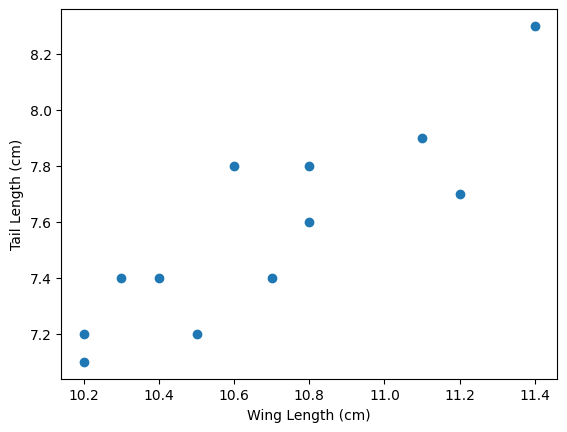

In [7]:
#1. Plot wing length vs. tail length

wingLength = np.array([10.4, 10.8, 11.1, 10.2, 10.3, 10.2 ,10.7, 10.5, 10.8, 11.2, 10.6, 11.4])
tailLength = np.array([7.4, 7.6, 7.9, 7.2, 7.4, 7.1, 7.4, 7.2, 7.8, 7.7, 7.8, 8.3])

plt.scatter(wingLength, tailLength)
plt.xlabel('Wing Length (cm)')
plt.ylabel('Tail Length (cm)')

In [19]:
#2. Calculate Correlation Coefficient Manually and Using np.corrcoef
meanWing = np.mean(wingLength)
meanTail = np.mean(tailLength)

rxy = np.sum((wingLength-meanWing)*(tailLength-meanTail))/np.sqrt(np.sum(np.square(wingLength-meanWing)))/np.sqrt(np.sum(np.square(tailLength-meanTail)))
corr_matrix = np.corrcoef(wingLength,tailLength)
ryx = rxy
print(f'rxy = {rxy:.4f} (computed) {corr_matrix[0,1]:.4f} (from corrcoef)')
print(f'ryx = {ryx:.4f} (computed) {corr_matrix[0,1]:.4f} (from corrcoef)')

rxy = 0.8704 (computed) 0.8704 (from corrcoef)
ryx = 0.8704 (computed) 0.8704 (from corrcoef)


In [14]:
# 3. Calculate Standard Error
r = corr_matrix[0,1]
n = len(wingLength)
se = np.sqrt((1-r**2)/(n-2))
print(f'Standard error of rxy = {se}')

# Calculate 95% Confidence Interval
#Fischer transformation
z = 0.5*np.log((1+r)/(1-r))
#Standard error of fischer transformation
s_z = 1/np.sqrt(n-3)
#Critical z score
confidenceLevel = 0.95
alpha = 1-confidenceLevel
z_crit = st.norm.ppf((1-alpha/2))

zUpper = z+z_crit*s_z
zLower = z-z_crit*s_z

rUpper = (np.exp(2*zUpper)-1)/(np.exp(2*zUpper)+1)
rLower = (np.exp(2*zLower)-1)/(np.exp(2*zLower)+1)

print(f'The 95% confidence interval is {rLower} to {rUpper}')

Standard error of rxy = 0.15571863652567375
The 95% confidence interval is 0.5923110780844787 to 0.9631598602746105


In [15]:
# 4.
tstat = r/se
df = n-2
p_value_two_tailed = 2 * (1 - st.t.cdf(abs(tstat), df))
print(f'p = {p_value_two_tailed}')

p = 0.00023110594312059085


In [18]:
# 5.
rs = 0.75
z_rs = 0.5*np.log((1+rs)/(1-rs))
lambda_stat = (z-z_rs)/s_z
p_value_two_tailed = 2 * (1 - st.t.cdf(abs(lambda_stat), df))
print(f'p = {p_value_two_tailed}')

p = 0.3034890172946687


In [24]:
# 6.
# Parameters
r = 0.5  # True correlation
alpha = 0.05  # Significance level
desired_power = 0.8  # Desired power level

# Calculate effect size
effect_size = r / np.sqrt(1 - r**2)

# Calculate power for different sample sizes
sample_sizes = range(10, 200)  # Sample sizes from 10 to 200
powers = []

for n in sample_sizes:
    power = sm.stats.NormalIndPower().solve_power(effect_size=effect_size, nobs1=n, alpha=alpha, alternative='two-sided')
    powers.append(power)

# Find the minimum sample size needed to achieve the desired power
min_sample_size = next(n for n, p in zip(sample_sizes, powers) if p >= desired_power)

print(f"Effect Size (Cohen's r): {effect_size:.4f}")
print(f"Minimum sample size needed to achieve {desired_power*100:.1f}% power: {min_sample_size}")

Effect Size (Cohen's r): 0.5774
Minimum sample size needed to achieve 80.0% power: 48
